In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("/Users/srigurubalaji/Desktop/P4/GUIDE_Train.csv")
test = pd.read_csv("/Users/srigurubalaji/Desktop/P4/GUIDE_Test.csv")

/var/folders/t8/nsx42tb97c31j_w562vj8h4m0000gn/T/ipykernel_15521/3083458180.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv("/Users/srigurubalaji/Desktop/P4/GUIDE_Test.csv")


In [4]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [5]:
train = train.drop(['ActionGrouped','ActionGranular','EmailClusterId','ThreatFamily','Roles','ResourceType','AntispamDirection','SuspicionLevel','LastVerdict','MitreTechniques','Timestamp'],axis = 'columns')
test = test.drop(['ActionGrouped','ActionGranular','EmailClusterId','ThreatFamily','Roles','ResourceType','AntispamDirection','SuspicionLevel','LastVerdict','MitreTechniques','Timestamp'],axis = 'columns')

In [6]:
train = train.drop_duplicates()
test = test.drop_duplicates()

In [7]:
train = train.dropna(subset=['IncidentGrade'])

In [8]:
train = train.convert_dtypes()
test = test.convert_dtypes()

In [9]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [10]:
train['Category'] = lb.fit_transform(train['Category'])
train['EntityType'] = lb.fit_transform(train['EntityType'])
train['EvidenceRole'] = lb.fit_transform(train['EvidenceRole'])

test['Category'] = lb.fit_transform(test['Category'])
test['EntityType'] = lb.fit_transform(test['EntityType'])
test['EvidenceRole'] = lb.fit_transform(test['EvidenceRole'])

In [11]:
train['IncidentGrade'] = lb.fit_transform(train['IncidentGrade'])
test['IncidentGrade'] = lb.fit_transform(test['IncidentGrade'])

In [12]:
trainx = train.drop(['IncidentGrade'],axis = 1)
trainy = train['IncidentGrade']

In [13]:
testx = test.drop(['IncidentGrade','Usage'],axis = 1)
testy = test['IncidentGrade']

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 5)

In [15]:
rfc.fit(trainx,trainy)

RandomForestClassifier(n_estimators=5)

In [16]:
rfc.score(testx,testy)

0.8999901853190218

In [17]:
y_predict = rfc.predict(testx)

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt 

In [20]:
cm = confusion_matrix(testy,y_predict)
cmdf = pd.DataFrame(cm)

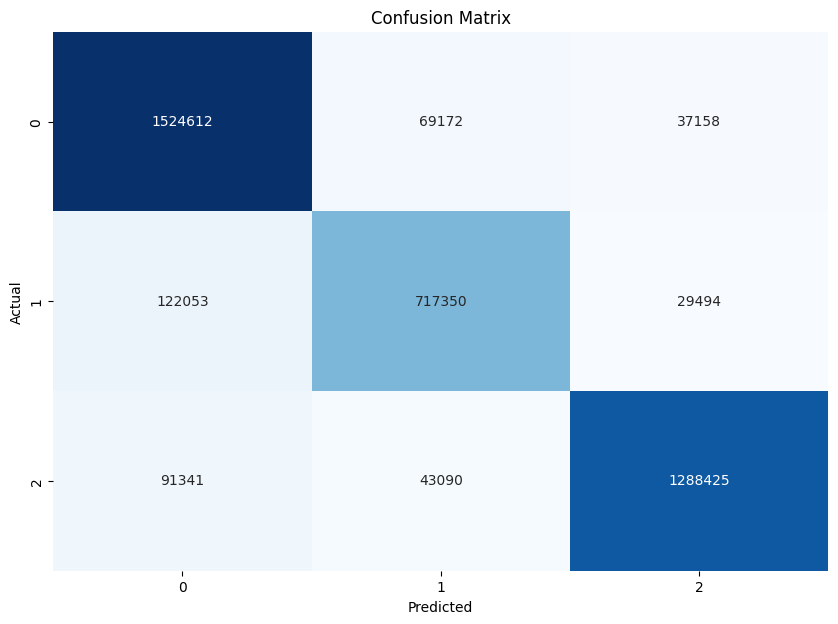

In [21]:
plt.figure(figsize=(10, 7))
sns.heatmap(cmdf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(testy, y_predict, average=None)
recall = recall_score(testy, y_predict, average=None)
f1 = f1_score(testy, y_predict, average=None)
print(precision)
print(recall)
print(f1)

[0.87721907 0.86468132 0.95081313]
[0.93480455 0.82558692 0.90552031]
[0.90509678 0.84468201 0.92761416]
